# Customer Churn Analysis

This analysis investigates the key factor that contribute to customer churn in the telco industry by analysing a customer dataset. By applying conditional probability, Bayes' theorem, descriptive statistics, the study uncover patterns linked to churn across different customer segments - such as customer account information,  service type, and demographics. The insights derived from this analysis will support customer retention strategies and provide a foundation for predicting churn likelihood in various customer profiles.
 
Data Source:https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

## Objective for the project

1. Identify Patterns in Churn Behavior:
   - Determine which customer attributes (e.g., tenure, age group, contract type) are strongly associated with a higher likelihood of churn.
2. Optimise Customer Retention Strategies:
   - Develop reccomendation based on churn patterns to proactively reduce churn rates among specific customer segments.
3. Quantify and Predict Churn Probability:
   - Calculate churn probabilities for different customer segment using conditional probability and Bayes' theorem to identify high-risk group and support targeted retention efforts. 

# Dataset Summary

| **Feature**           | **Description**                                                                                  |
|-----------------------|--------------------------------------------------------------------------------------------------|
| **customerID**        | Unique customer ID.                                                                              |
| **gender**            | Customer's gender (Male/Female).                                                                 |
| **SeniorCitizen**     | Senior citizen status (1 = Yes, 0 = No).                                                         |
| **Partner**           | Has a partner (Yes/No).                                                                          |
| **Dependents**        | Has dependents (Yes/No).                                                                         |
| **tenure**            | Months with the company.                                                                         |
| **PhoneService**      | Has phone service (Yes/No).                                                                      |
| **MultipleLines**     | Has multiple lines (Yes/No/No phone service).                                                    |
| **InternetService**   | Internet type (DSL/Fiber optic/None).                                                            |
| **OnlineSecurity**    | Has online security (Yes/No/No internet service).                                                |
| **OnlineBackup**      | Has online backup (Yes/No/No internet service).                                                  |
| **DeviceProtection**  | Has device protection (Yes/No/No internet service).                                              |
| **TechSupport**       | Has tech support (Yes/No/No internet service).                                                   |
| **StreamingTV**       | Has streaming TV (Yes/No/No internet service).                                                   |
| **StreamingMovies**   | Has streaming movies (Yes/No/No internet service).                                               |
| **Contract**          | Contract type (Month-to-month/One year/Two year).                                                |
| **PaperlessBilling**  | Uses paperless billing (Yes/No).                                                                 |
| **PaymentMethod**     | Payment method (Electronic check/Mailed check/Bank transfer/Credit card).                        |
| **MonthlyCharges**    | Monthly charge amount.                                                                           |
| **TotalCharges**      | Total charge amount over tenure.                                                                 |
| **Churn**             | Whether the customer churned (Yes/No).                                                           |


<h3>Feature Categories</h3>
<ul>
  <li><strong>Demographics</strong>: <code>gender</code>, <code>SeniorCitizen</code>, <code>Partner</code>, <code>Dependents</code></li>
  <li><strong>Account Info</strong>: <code>tenure</code>, <code>Contract</code>, <code>PaymentMethod</code></li>
  <li><strong>Service Types</strong>: <code>PhoneService</code>, <code>InternetService</code>, <code>StreamingTV</code>, and others</li>
</ul>


# 1. Load and Clean data

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data
df = pd.read_csv('Customer_Churn_Data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Check for Missing Values and Data Types

In [2]:
# Check data types and initial null values
df.info()

# Check for missing values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Check for Whitespace Cells

In [3]:
# Count whitespace-only cells per column (object columns may have whitespace as missing data)
whitespace_counts = df.apply(lambda col: col.apply(lambda x: isinstance(x, str) and x.isspace()).sum())
print("Whitespace-only cell counts per column:")
print(whitespace_counts)

Whitespace-only cell counts per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


- Found 11 whitespace cells in **TotalCharges** column.

In [4]:
# Convert whitespace in TotalCharges to NaN for easier handling
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Display rows where TotalCharges is NaN
missing_total_charges_rows = df[df['TotalCharges'].isna()]

# Display the result
missing_total_charges_rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Rows with missing values in **TotalCharges** also have **tenure** equal to 0.  
- In the next step, verify if there are any additional rows where **tenure** equals 0.

In [5]:
# Display rows where Tenure = 0
tenure_0 = df[df['tenure'] == 0]

# Display the result
tenure_0

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


There are no additional rows with **tenure** equal to 0.  
The rows with **tenure** equal to 0 also have missing **TotalCharges**, indicating that these customers have not yet completed a billing cycle.

## Fill Missing Values in TotalCharges

In [6]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

- Replaced missing **TotalCharges** values with 0 for customers who haven't yet incurred charges.

## Summary Statistics of Numerical Features

In [7]:
# Summary Statistics of a Numerical Feature
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


- Review basic statistics (mean, min, max) for tenure, monthly charges, and total charges to check data quality and identify any potential outliers or unusual values in these key features.

# 2. EDA

In [8]:
# Set up the order globally for a nice visualisation
df['gender'] = pd.Categorical(df['gender'], categories=['Female', 'Male'], ordered=True)
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'Not Senior', 1: 'Senior'})
df['SeniorCitizen'] = pd.Categorical(df['SeniorCitizen'], categories=['Not Senior','Senior'])
df['Partner'] = pd.Categorical(df['Partner'], categories=['Yes','No'])
df['Dependents'] = pd.Categorical(df['Dependents'], categories=['Yes','No'])

## Demographic Distribution

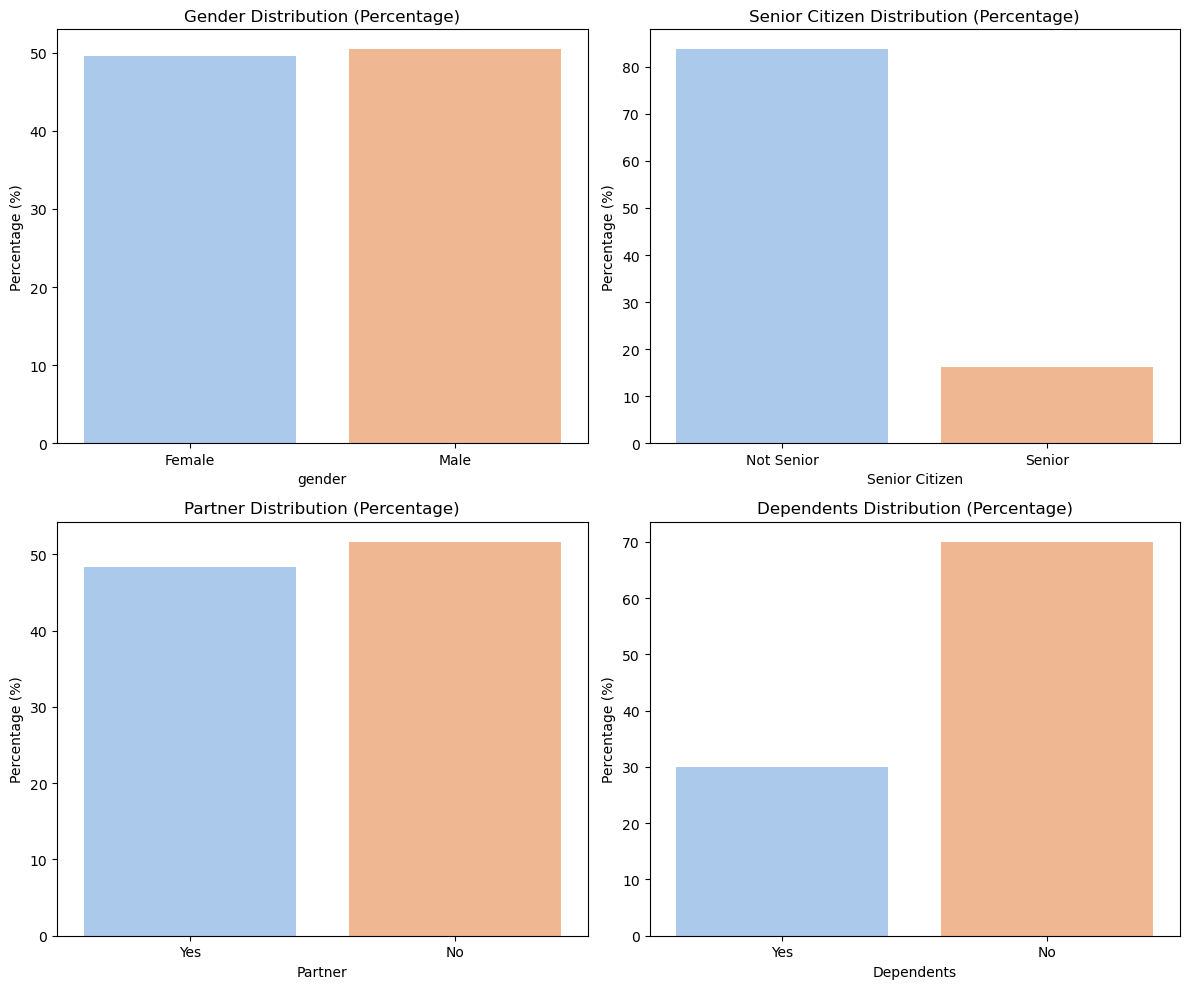

In [9]:
# Set up a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gender Distribution Plot
gender_counts = df['gender'].value_counts(normalize=True) * 100
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axs[0, 0], hue=gender_counts.index, palette='pastel')
axs[0, 0].set_title('Gender Distribution (Percentage)')
axs[0, 0].set_ylabel('Percentage (%)')

# SeniorCitizen Distribution
senior_counts = df['SeniorCitizen'].value_counts(normalize=True) * 100
sns.barplot(x=senior_counts.index, y=senior_counts.values, ax=axs[0, 1], hue=senior_counts.index, palette='pastel', legend=False)
axs[0, 1].set_title('Senior Citizen Distribution (Percentage)')
axs[0, 1].set_ylabel('Percentage (%)')
axs[0, 1].set_xlabel('Senior Citizen')

# Partner Distribution
partner_counts = df['Partner'].value_counts(normalize=True) * 100
sns.barplot(x=partner_counts.index, y=partner_counts.values, ax=axs[1, 0], order=['Yes', 'No'], hue=partner_counts.index, palette='pastel', legend=False)
axs[1, 0].set_title('Partner Distribution (Percentage)')
axs[1, 0].set_ylabel('Percentage (%)')

# Dependents Distribution 
dependents_counts = df['Dependents'].value_counts(normalize=True) * 100
sns.barplot(x=dependents_counts.index, y=dependents_counts.values, ax=axs[1, 1], order=['Yes', 'No'], hue=dependents_counts.index, palette='pastel', legend=False)
axs[1, 1].set_title('Dependents Distribution (Percentage)')
axs[1, 1].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

The customer distribution graph shows the following insights:

1. **Gender**: The dataset reveals an equal distribution between male (50.1%) and female (49.9%) customers.

2. **Senior Citizen Distribution**: A significant majority of the customers are non-seniors (84%), compared to seniors (16%).

3. **Partner Distribution**: There is a nearly equal split between customers who are single (52%) and those with partners (48%).

4. **Dependents Distribution**: A majority of customers do not have dependents (70%), contrasting with who have dependents (30%).

## Churn Rate by Demographic

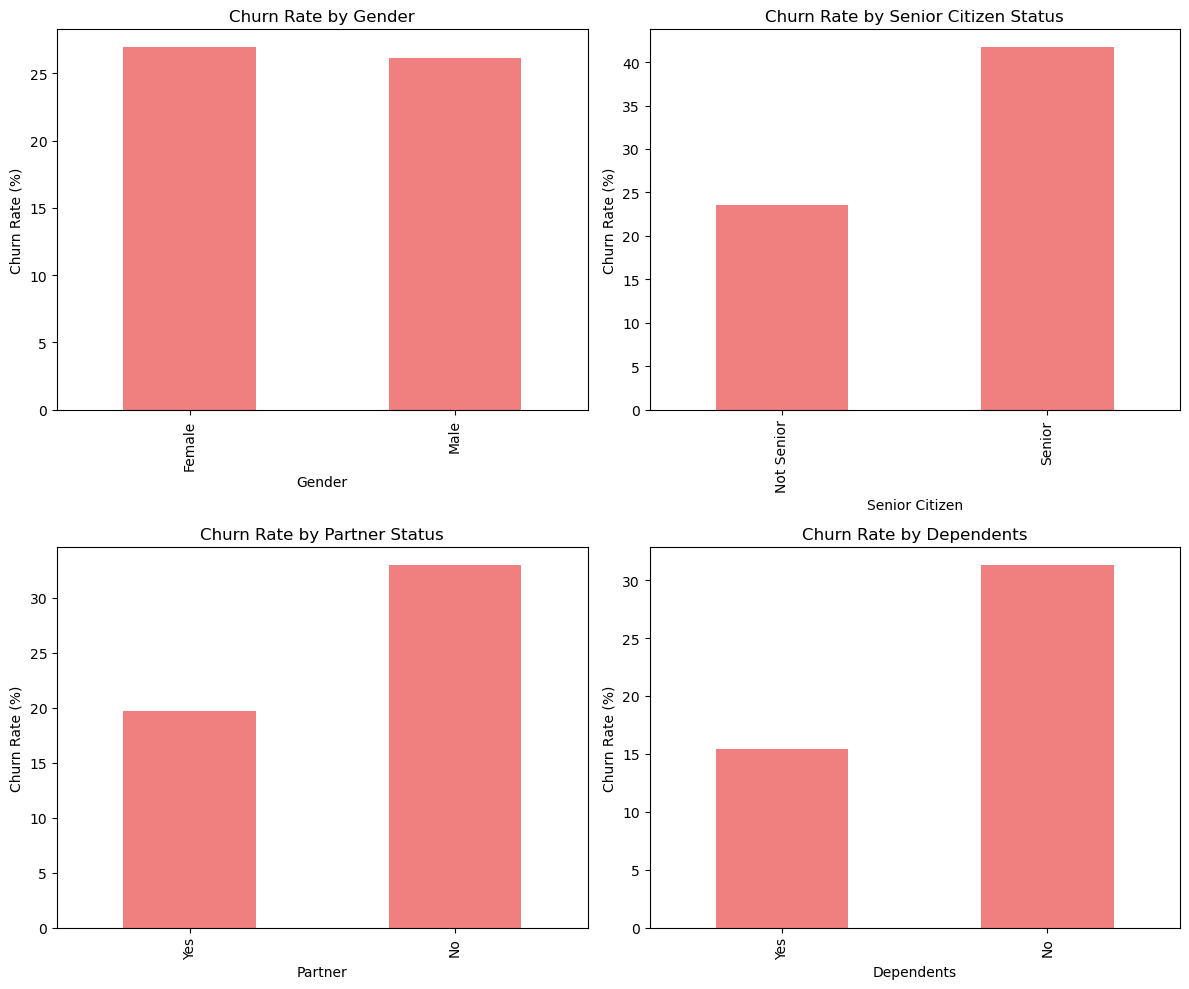

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))

# Gender vs. Churn Rate
churn_by_gender = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100
churn_by_gender['Yes'].plot(kind='bar', ax=axs[0,0], color='lightcoral')
axs[0,0].set_title('Churn Rate by Gender')
axs[0,0].set_ylabel('Churn Rate (%)')
axs[0,0].set_xlabel('Gender')

# SeniorCitizen vs. Churn Rate
churn_by_senior = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
churn_by_senior['Yes'].plot(kind='bar', ax=axs[0, 1], color='lightcoral')
axs[0, 1].set_title('Churn Rate by Senior Citizen Status')
axs[0, 1].set_ylabel('Churn Rate (%)')
axs[0, 1].set_xlabel('Senior Citizen')

# Partner vs. Churn Rate
churn_by_partner = pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100
churn_by_partner['Yes'].plot(kind='bar', ax=axs[1, 0], color='lightcoral')
axs[1, 0].set_title('Churn Rate by Partner Status')
axs[1, 0].set_ylabel('Churn Rate (%)')
axs[1, 0].set_xlabel('Partner')

# Dependents vs. Churn Rate
churn_by_dependents = pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100
churn_by_dependents['Yes'].plot(kind='bar', ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('Churn Rate by Dependents')
axs[1, 1].set_ylabel('Churn Rate (%)')
axs[1, 1].set_xlabel('Dependents')

plt.tight_layout()
plt.show()

- **Senior Citizens**: Churn rate of **41.68%**, significantly higher than non-seniors at 23.61%. <span style="color:red">**However, we will further explore if the higher churn rate among senior citizens is truly significant compared to the overall population using Bayes' theorem.</span>**
- **Customers with Partners**: Lower churn rate of 15.45%, indicating potential links to loyalty and stability.
- **Next Steps**: Further analysis needed on churn trends among senior citizens and partnered customers to enhance retention strategies.

## Churn by Customer Charges and Tenure

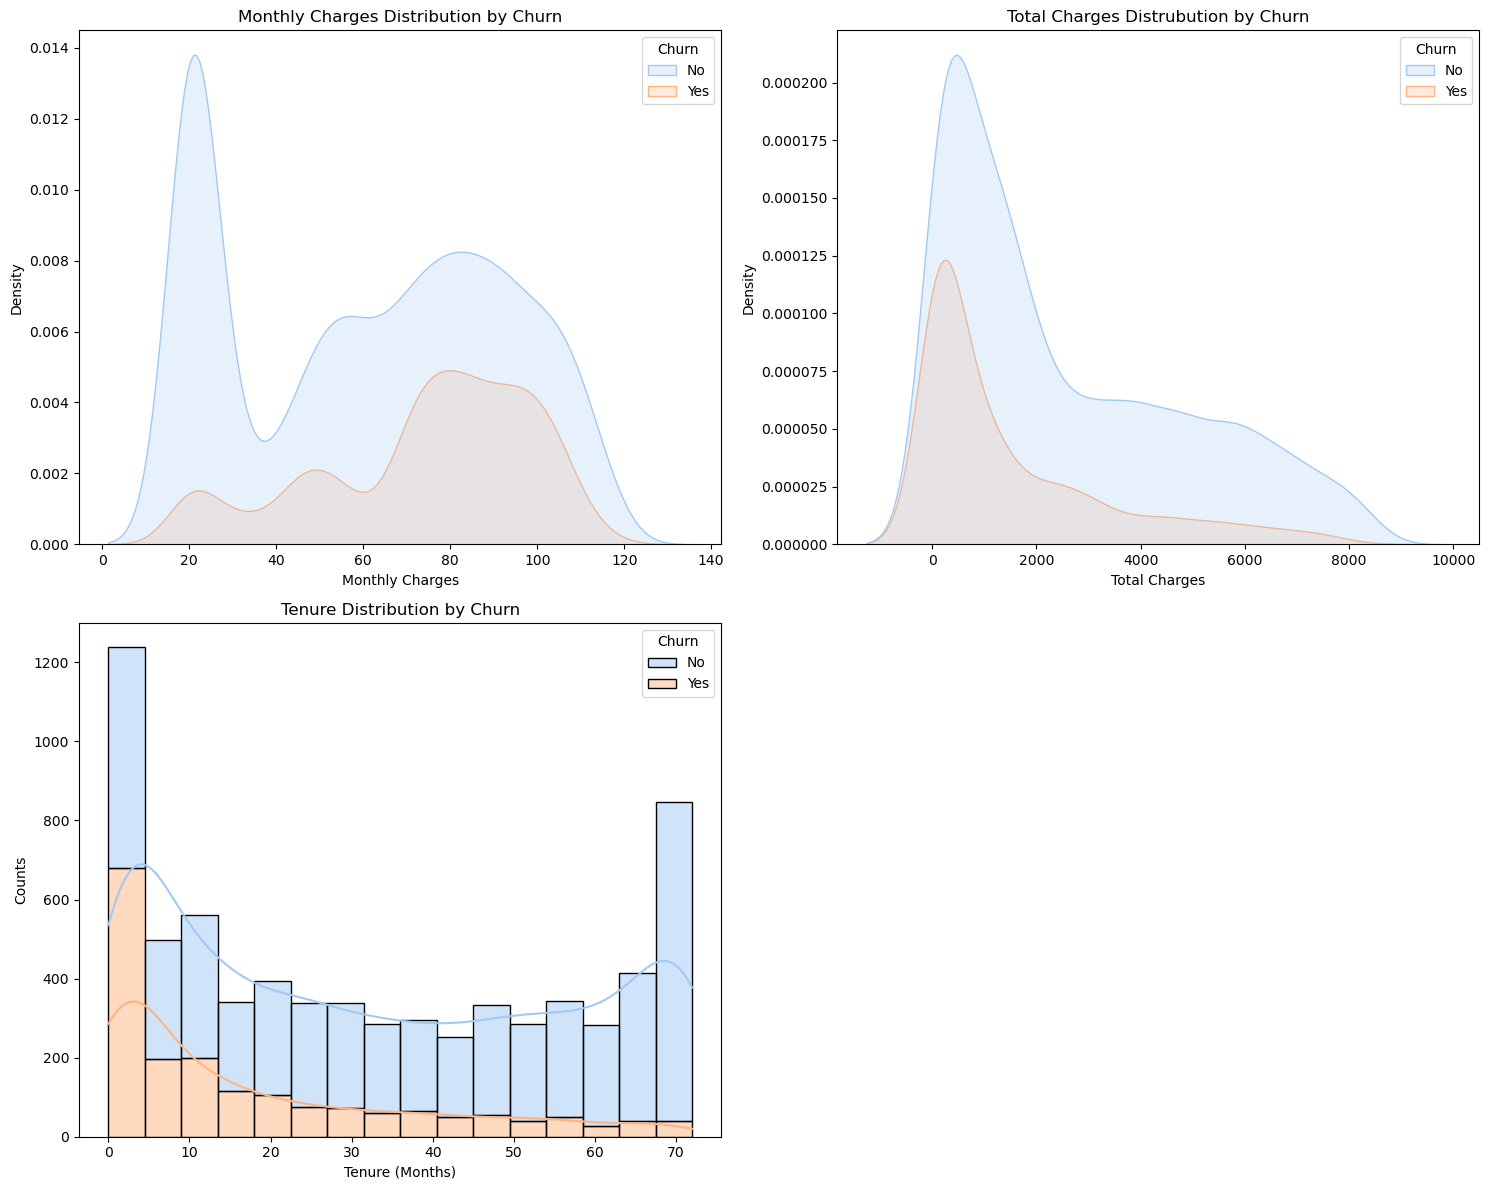

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

# Monthly Charges Distribution by Churn
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette='pastel', ax=axs[0, 0])
axs[0, 0].set_title('Monthly Charges Distribution by Churn')
axs[0, 0].set_xlabel('Monthly Charges')
axs[0, 0].set_ylabel('Density')

# Total Charges Distribution by Churn
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, palette='pastel', ax=axs[0, 1])
axs[0, 1].set_title('Total Charges Distrubution by Churn')
axs[0, 1].set_xlabel('Total Charges')
axs[0, 1].set_ylabel('Density')

# Tenure Distribution by Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True, palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Tenure Distribution by Churn')
axs[1, 0].set_xlabel('Tenure (Months)')
axs[1, 0].set_ylabel('Counts')

axs[1, 1].axis('off')

plt.tight_layout() 
plt.show()

- **Monthly Charges**: Churn is highest among customers paying mid-range charges (\\$70-\\$100).
- **Total Charges**: Higher total charges are linked to lower churn, likely due to longer customer tenure.
- **Tenure**: Churn is highest in the first six months and decreases over time, emphasising the need to fucus on new customers for retention. 

## Churn Rate Analysis by Contract Type, Paperless Billing, and Payment Method

In [12]:
# Set up the order globally for a nice visualisation
df['Contract'] = pd.Categorical(df['Contract'], categories=['Month-to-month', 'One year','Two year'], ordered=True)
df['PaperlessBilling'] = pd.Categorical(df['PaperlessBilling'], categories=['Yes', 'No'], ordered=True)
df['PaymentMethod'] = pd.Categorical(df['PaymentMethod'], categories=['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'], ordered=True)

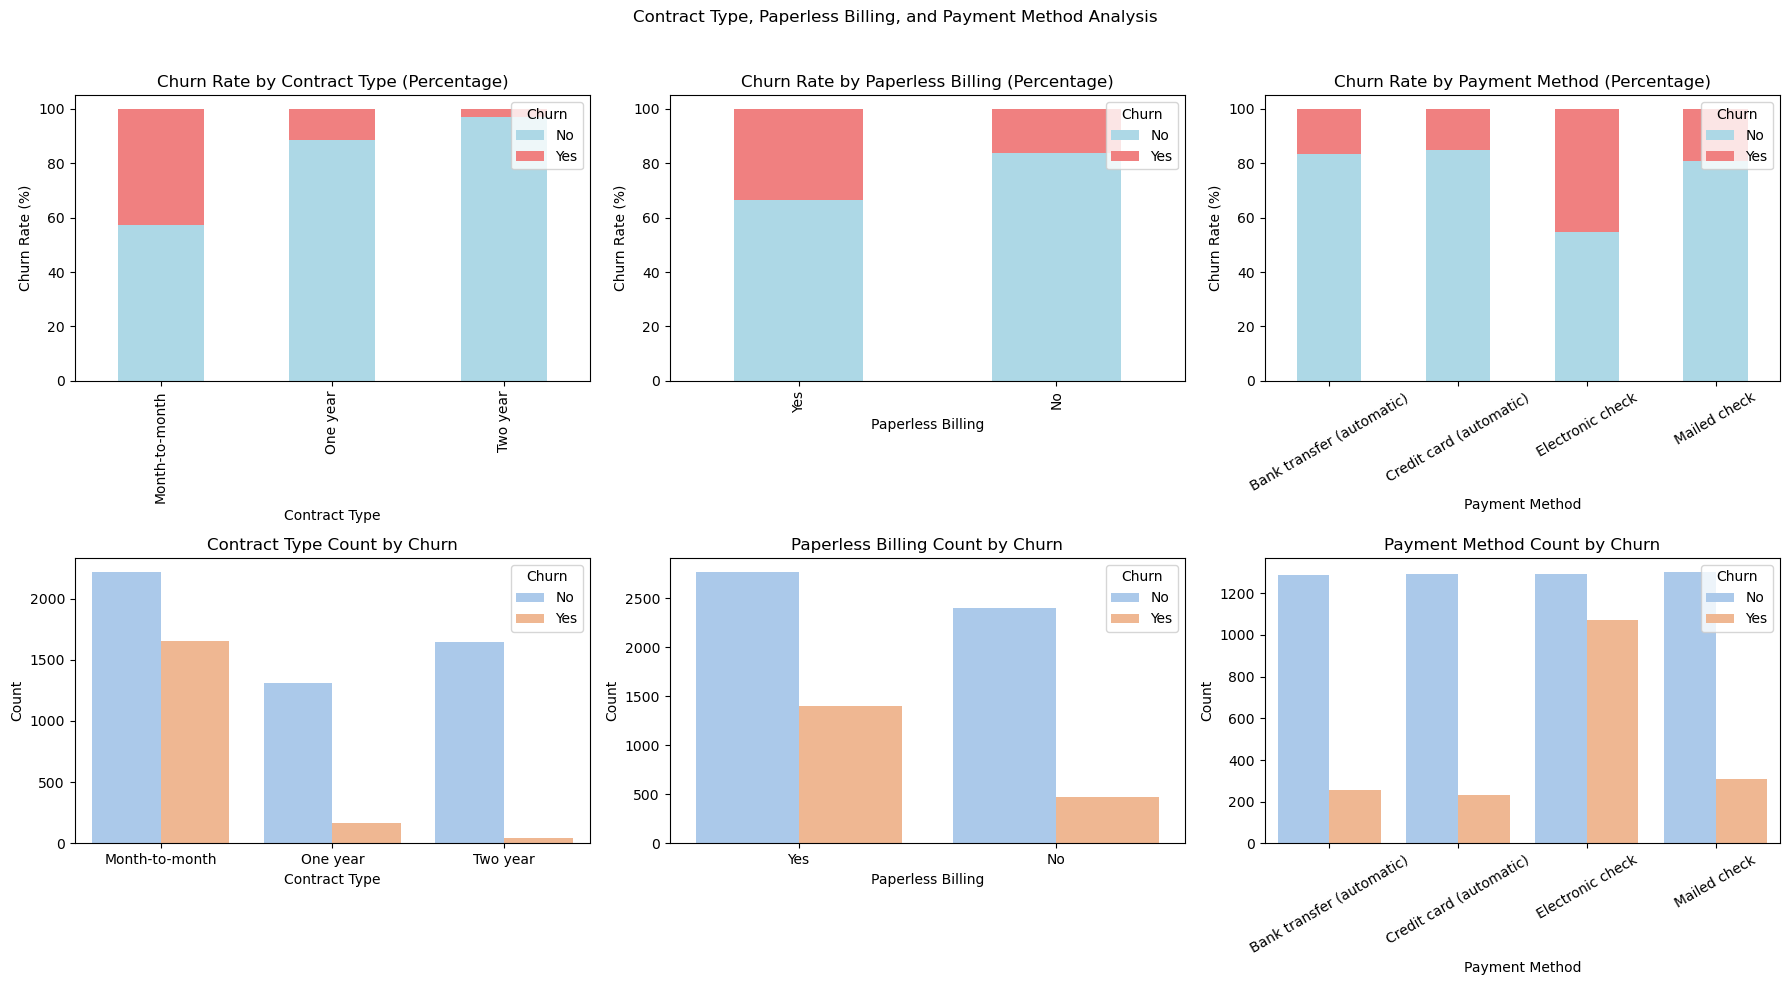

Churn Percentage by Contract Type:
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83

Churn Percentage by Paperless Billing:
Churn                No    Yes
PaperlessBilling              
Yes               66.43  33.57
No                83.67  16.33

Churn Percentage by Payment Method:
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


In [13]:
fig, axs = plt.subplots(2, 3, figsize=(18,10))
fig.suptitle('Contract Type, Paperless Billing, and Payment Method Analysis')

# 1. Contract Type Churn Rate (Percentage)
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')*100
contract_churn.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=axs[0, 0])
axs[0, 0].set_title('Churn Rate by Contract Type (Percentage)')
axs[0, 0].set_xlabel('Contract Type')
axs[0, 0].set_ylabel('Churn Rate (%)')
axs[0, 0].legend(title='Churn', loc='upper right')

# Contract Type Count by Churn
sns.countplot(data=df, x='Contract', hue='Churn', palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Contract Type Count by Churn')
axs[1, 0].set_xlabel('Contract Type')
axs[1, 0].set_ylabel('Count')

# 2. Paperless Billing Churn Rate (Percentage)
paperless_churn = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index')*100
paperless_churn.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=axs[0, 1])
axs[0, 1].set_title('Churn Rate by Paperless Billing (Percentage)')
axs[0, 1].set_xlabel('Paperless Billing')
axs[0, 1].set_ylabel('Churn Rate (%)')
axs[0, 1].legend(title='Churn', loc='upper right')

# Paperless Billing Count by Churn
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title('Paperless Billing Count by Churn')
axs[1, 1].set_xlabel('Paperless Billing')
axs[1, 1].set_ylabel('Count')

# 3. Payment Method Churn Rate (Percentage)
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')*100
payment_churn.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=axs[0, 2])
axs[0, 2].set_title('Churn Rate by Payment Method (Percentage)')
axs[0, 2].set_xlabel('Payment Method')
axs[0, 2].set_ylabel('Churn Rate (%)')
axs[0, 2].legend(title='Churn', loc='upper right')
axs[0, 2].tick_params(axis='x', rotation=30)

# Payment Method Count by Churn
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='pastel', ax=axs[1,2])
axs[1, 2].set_title('Payment Method Count by Churn')
axs[1, 2].set_xlabel('Payment Method')
axs[1, 2].set_ylabel('Count')
axs[1, 2].tick_params(axis='x', rotation=30)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Display the calculated percentages
print("Churn Percentage by Contract Type:")
print(contract_churn.round(2))
print("\nChurn Percentage by Paperless Billing:")
print(paperless_churn.round(2))
print("\nChurn Percentage by Payment Method:")
print(payment_churn.round(2))

Churn rates are highest among customers with **month-to-month contracts**, **paperless billing**, and **electronic checks** as a payment method.

- **Contract Type**:
  - Month-to-month contracts have a high churn rate (42.71%), while one-year (11.27%) and two-year contracts (2.83%) show much lower churn.
- **Paperless Billing**:
  - Customers using paperless billing have a churn rate of 33.57%, significantly higher than those without paperless billing (16.33%).
- **Payment Method**:
  - Customers paying via electronic check have the highest churn rate (45.29%) compared to other payment methods like bank transfer (16.71%) and mailed check (19.11%).

## Churn Rate Analysis by Service Type

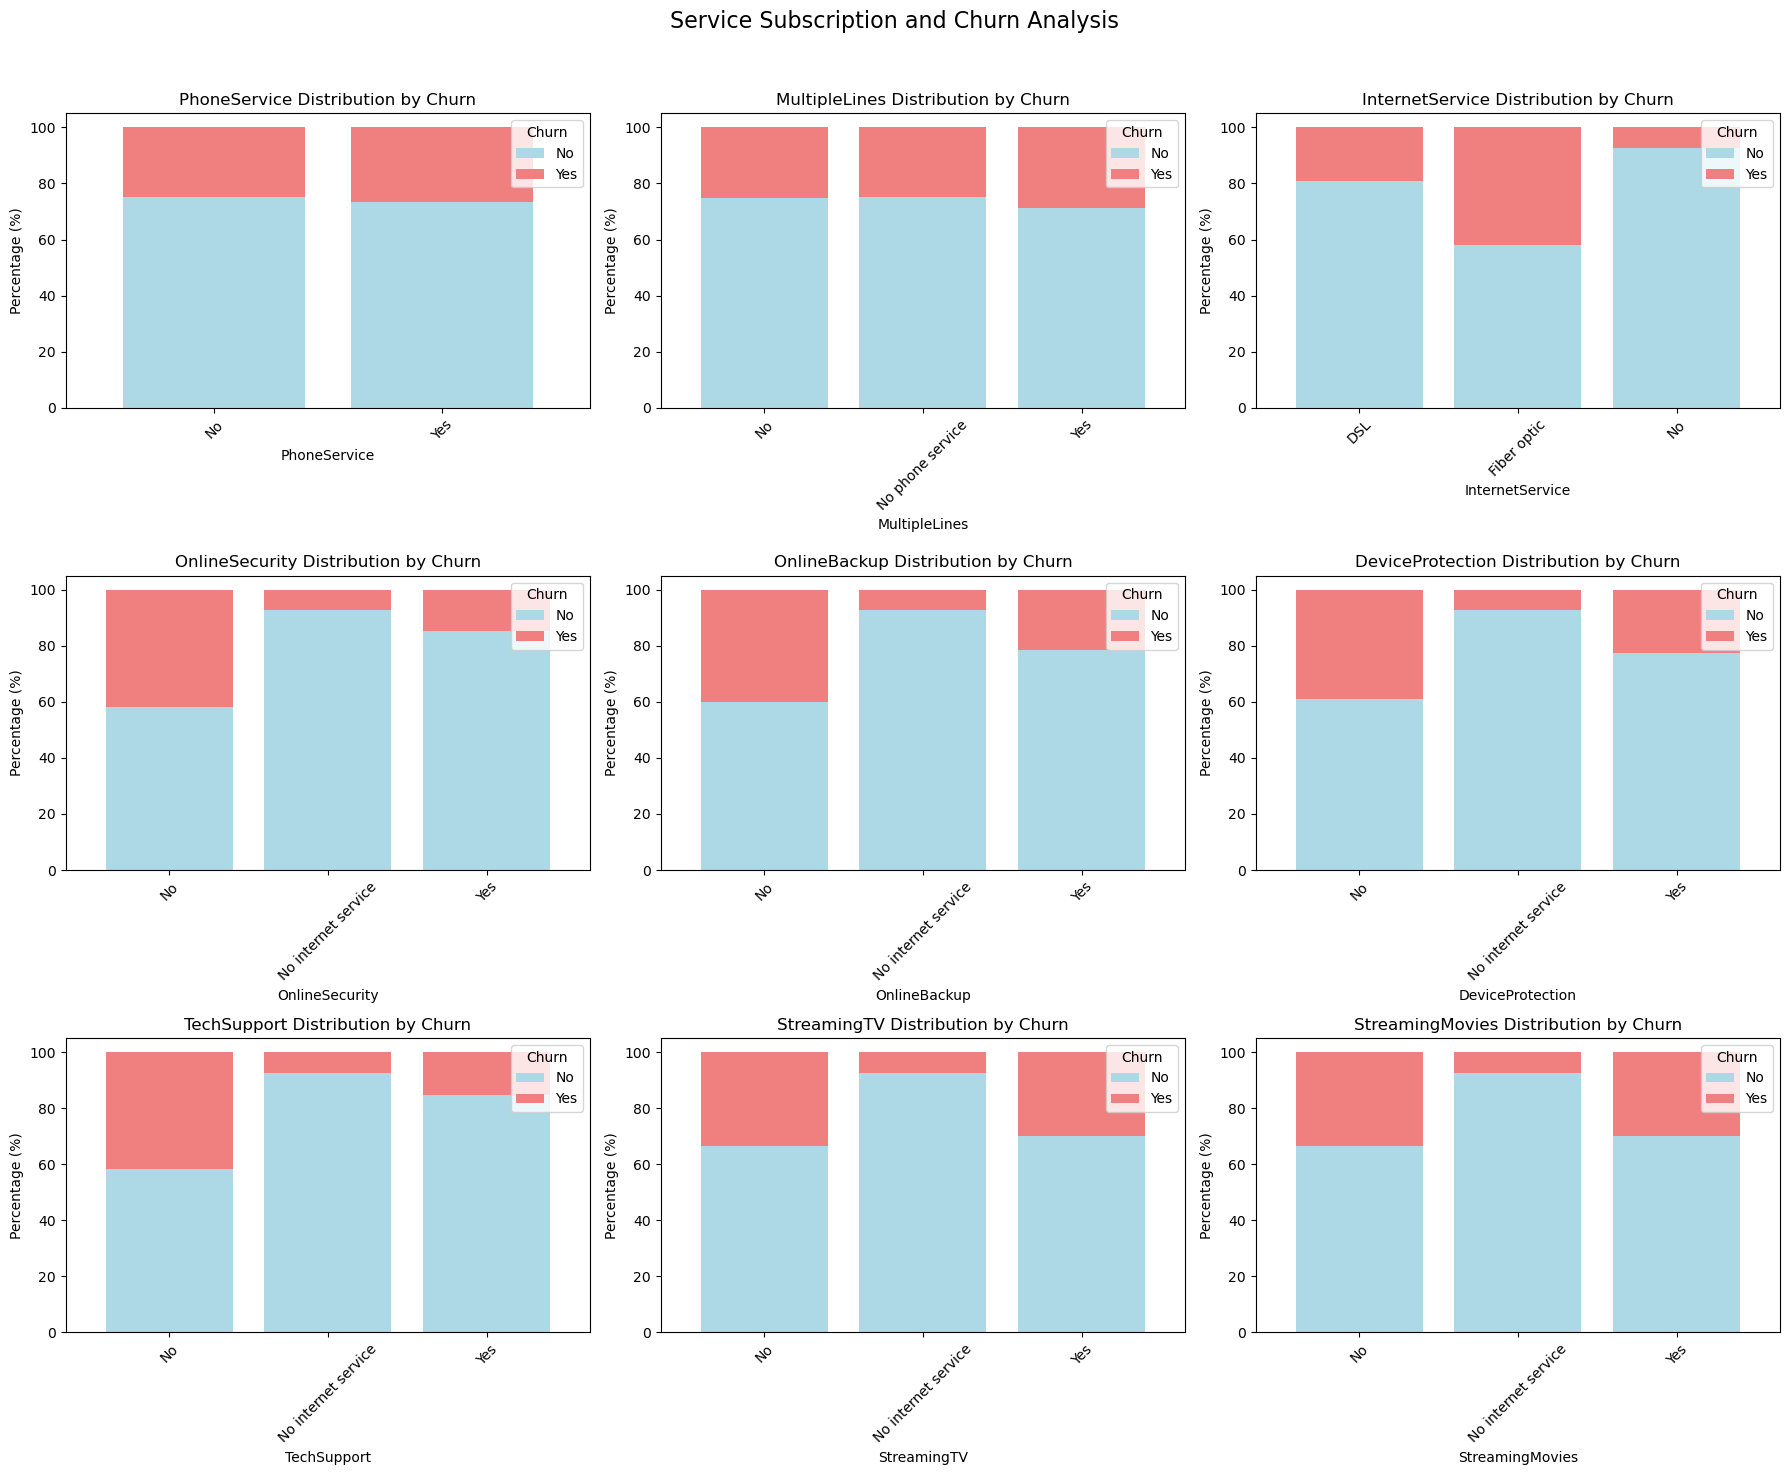

In [14]:
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the figure
fig, axs = plt.subplots(3, 3, figsize=(18,15))
fig.suptitle('Service Subscription and Churn Analysis', fontsize=16)

# Loop through each service type
for i, column in enumerate(service_columns):
    row = i // 3
    col = i % 3
    ax = axs[row, col]

    service_churn = pd.crosstab(df[column], df['Churn'],normalize='index') * 100                                               
    service_churn.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=ax, width=0.8)
    
    ax.set_title(f'{column} Distribution by Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage (%)')
    ax.legend(title='Churn', loc='upper right')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])   
plt.show()

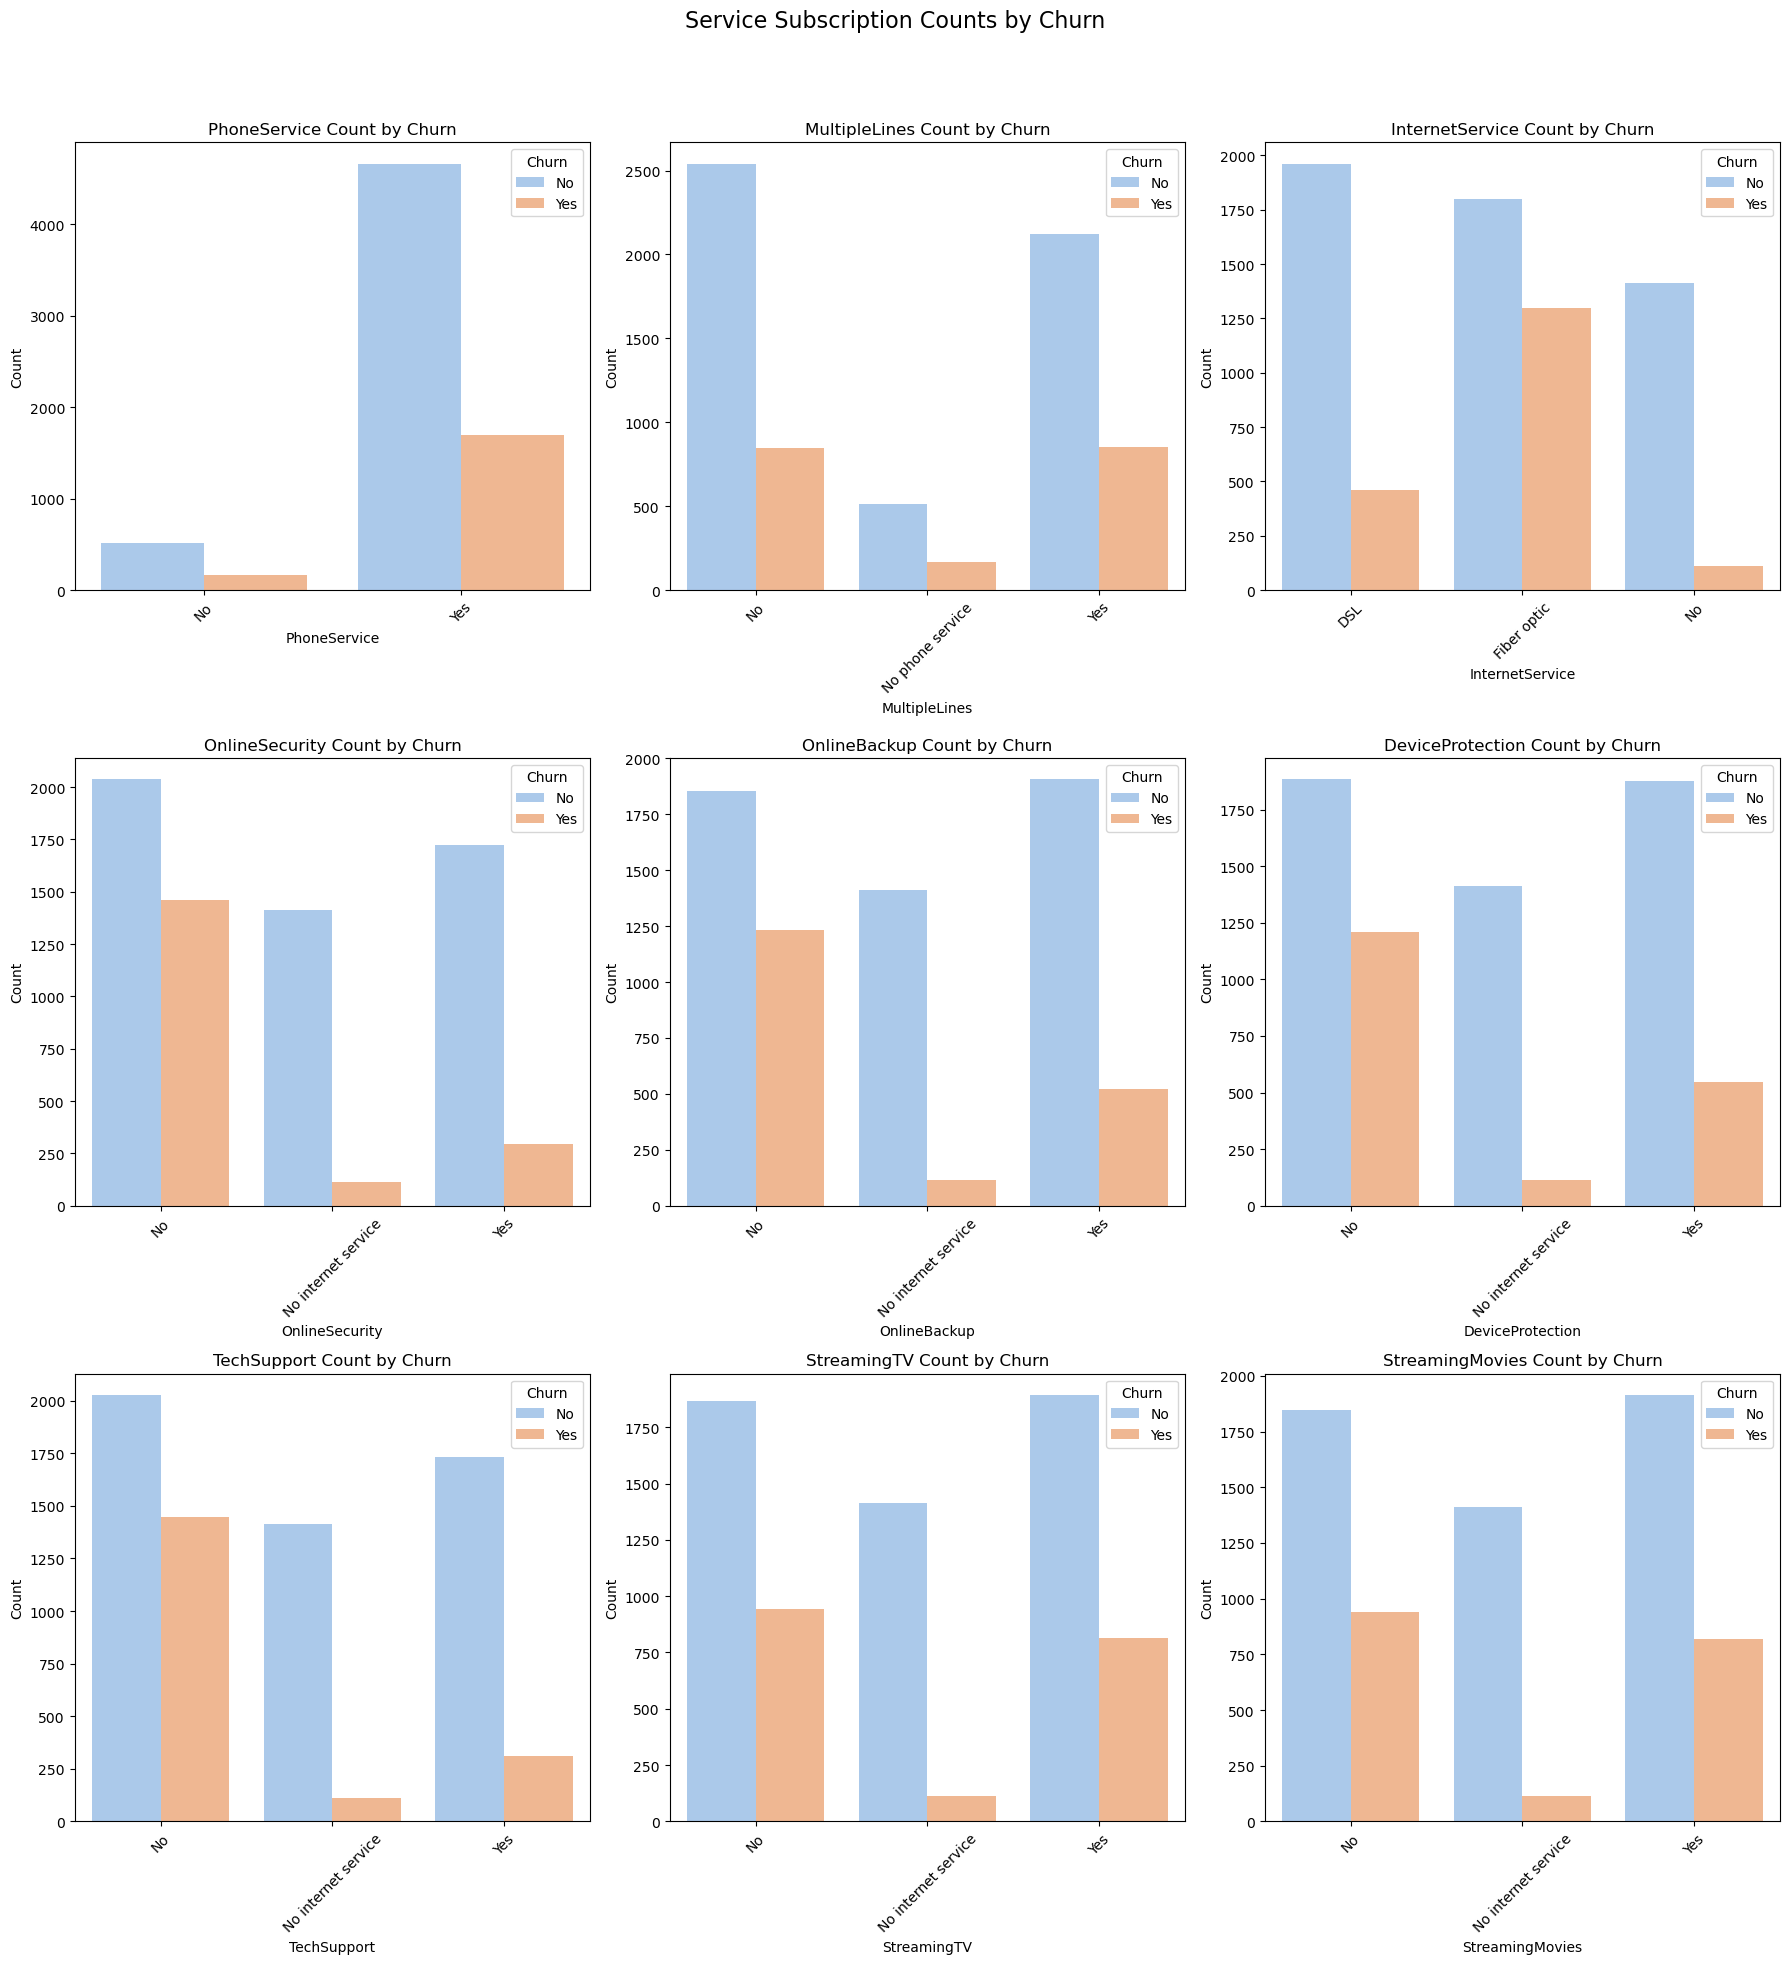

In [15]:
# List of service columns
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the figure
fig, axs = plt.subplots(3, 3, figsize=(18, 20))
fig.suptitle('Service Subscription Counts by Churn', fontsize=16)

# Loop through each service type
for i, column in enumerate(service_columns):
    row = i // 3
    col = i % 3
    ax = axs[row, col]

    churn_counts = pd.crosstab(df[column], df['Churn']).reset_index().melt(id_vars=column, var_name='Churn', value_name='Count')
    sns.barplot(data=churn_counts, x=column, y='Count', hue='Churn', palette='pastel', ax=ax)

    ax.set_title(f'{column} Count by Churn')
    ax.set_ylabel('Count')
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

In [16]:
# List of service columns
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]


# Loop through each service type
for i, column in enumerate(service_columns):
    
    
    # Churn rate by service type
    service_churn = pd.crosstab(df[column], df['Churn'], normalize='index') * 100
    # Display the calculated percentages
    print(f'{column}:')
    print(service_churn.round(2))
    print(" ")
       

PhoneService:
Churn            No    Yes
PhoneService              
No            75.07  24.93
Yes           73.29  26.71
 
MultipleLines:
Churn                No    Yes
MultipleLines                 
No                74.96  25.04
No phone service  75.07  24.93
Yes               71.39  28.61
 
InternetService:
Churn               No    Yes
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40
 
OnlineSecurity:
Churn                   No    Yes
OnlineSecurity                   
No                   58.23  41.77
No internet service  92.60   7.40
Yes                  85.39  14.61
 
OnlineBackup:
Churn                   No    Yes
OnlineBackup                     
No                   60.07  39.93
No internet service  92.60   7.40
Yes                  78.47  21.53
 
DeviceProtection:
Churn                   No    Yes
DeviceProtection                 
No                   60.87  39.13
No internet service  92.60   7.40
Yes    

Churn rate is highest among customers with **fiber optic internet** and those **without online security, backup, device protection, or tech support.**  

- **Internet Service**:
  - Fiber optic user have a high churn rate (41.89%), while DSL(18.96%) and no internet service(7.40%) show lower churn.
- **Add ons Service**:
  - Churn rate of customer with no Add ons Service is around 40%, online security (41.77%), online backup (39.93%), device protection (39.13), and tech support (41.64)


## Analysis of Number of Services and Churn Rate

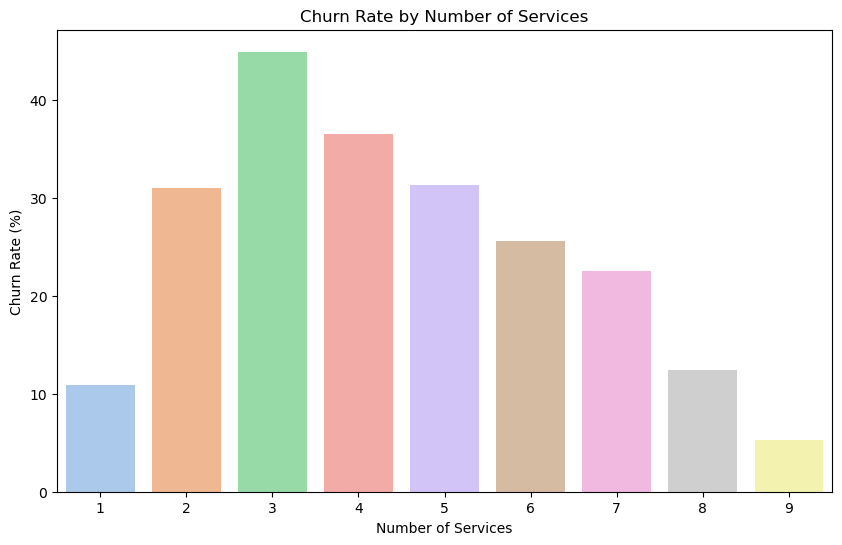

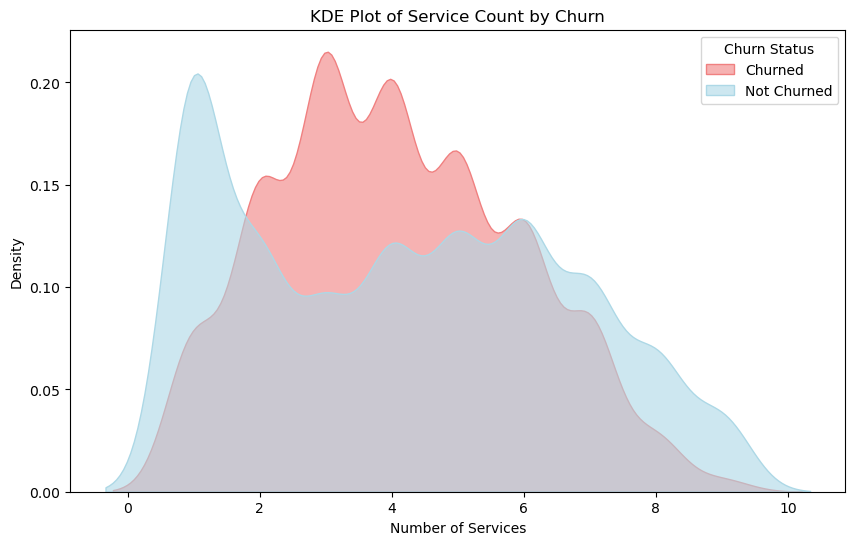

In [17]:
# List of service columns
service_columns = [
    'PhoneService', 'MultipleLines', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create a column for the number of services a customer has, including InternetService as a counted service
df['ServiceCount'] = df[service_columns].apply(lambda x: sum(x == 'Yes'), axis=1)
df['ServiceCount'] += df['InternetService'].apply(lambda x: 1 if x in ['DSL', 'Fiber optic'] else 0)

# Calculate churn rate by number of services
churn_by_service_count = df.groupby('ServiceCount')['Churn'].value_counts(normalize=True).unstack() * 100

# Bar Chart: Churn Rate by Number of Services
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_by_service_count.index, y=churn_by_service_count['Yes'],hue=churn_by_service_count.index, legend=False, palette='pastel')
plt.title('Churn Rate by Number of Services')
plt.xlabel('Number of Services')
plt.ylabel('Churn Rate (%)')
plt.show()

# KDE Plot: Service Count Distribution for Churned vs. Non-Churned Customers
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']['ServiceCount'], label='Churned', fill=True, color='lightcoral', alpha=0.6)
sns.kdeplot(df[df['Churn'] == 'No']['ServiceCount'], label='Not Churned', fill=True, color='lightblue', alpha=0.6)
plt.title('KDE Plot of Service Count by Churn')
plt.xlabel('Number of Services')
plt.ylabel('Density')
plt.legend(title='Churn Status')
plt.show()

- The churn rate is highest for customers with 3 services (over 40%) and decreases as the number of subscribed services increase. 

- The decline in churn rates with higher service counts suggests that customers using more service are more likely to stay with the company.  
- The peak at 3 services may indicate a specific group or pattern of dissatisfaction among customers with modersate service usage.

### Summary
**To reduce churn and increase revenue, focus on selling either 1 service or more than 6 services, as these customers are the least likely to leave. For customers with 2-5 services, improving customer satisfaction could help lower their higher churn rates.**

# 3. Conditional Probability

### 1. What is the probability of a customer churning given that they have a month-to-month contract, use paperless billing, and pay via electronic check?

### **P(Churn | High-Risk Conditions)**  = 57.7%  
​High-Risk Conditions = customer with month-to-month contract and use paperless billing and pay via electronic check

In [37]:
# Filter the dataset for relevant conditions
high_risk_customers = df[
    (df['Contract'] == 'Month-to-month') &
    (df['PaperlessBilling'] == 'Yes') &
    (df['PaymentMethod'] == 'Electronic check')
]

# Calculate conditional probability of churn for this high-risk group
churn_counts_high_risk = high_risk_customers['Churn'].value_counts(normalize=True) * 100
churn_counts_high_risk = churn_counts_high_risk.rename(index={'Yes': 'Churn', 'No': 'Not Churn'})

print("Conditional Probability of Churn for High-Risk Group:")
print(churn_counts_high_risk.round(2))

Conditional Probability of Churn for High-Risk Group:
Churn
Churn        57.7
Not Churn    42.3
Name: proportion, dtype: float64


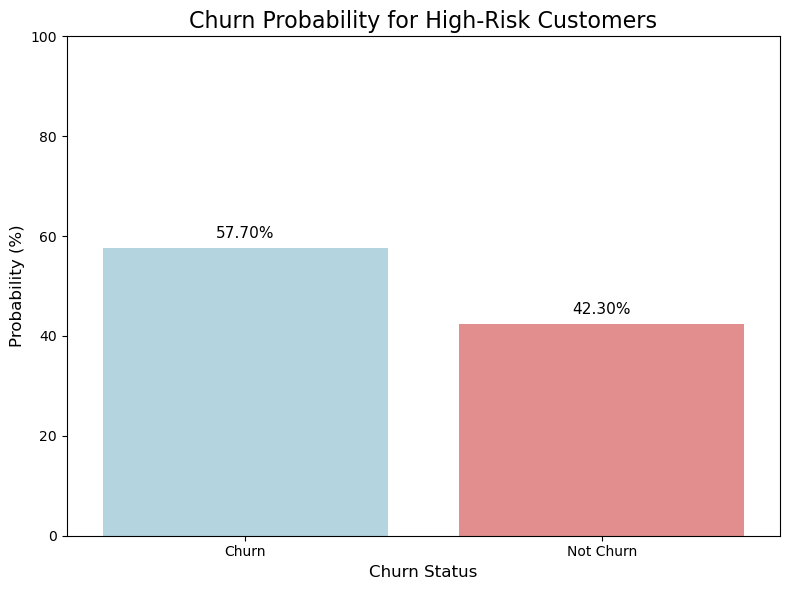

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x=churn_counts_high_risk.index,
    y=churn_counts_high_risk.values,
    palette=['lightblue', 'lightcoral'],
    hue = churn_counts_high_risk.index,
    legend = False
)

plt.title('Churn Probability for High-Risk Customers', fontsize=16)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)
plt.ylim(0, 100)

for i, value in enumerate(churn_counts_high_risk.values):
    plt.text(i, value + 2, f'{value:.2f}%', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

### 2. What is the probability of churn for a customers without add-on services

### **P(Churn | No Add-On Services)**  = 56.67%  
Add-on Services = Online Security, Tech Support, Device Protection, Online Backup

In [39]:
no_add_on_customers = df[
    (df['OnlineSecurity'] == 'No') &
    (df['TechSupport'] == 'No') &
    (df['DeviceProtection'] == 'No') &
    (df['OnlineBackup'] == 'No')
]

churn_counts_no_add_on = no_add_on_customers['Churn'].value_counts(normalize=True) * 100

print('Churn Probability for Customer Without Add-on Services:')
print(churn_counts_no_add_on.round(2))

Churn Probability for Customer Without Add-on Services:
Churn
Yes    56.67
No     43.33
Name: proportion, dtype: float64


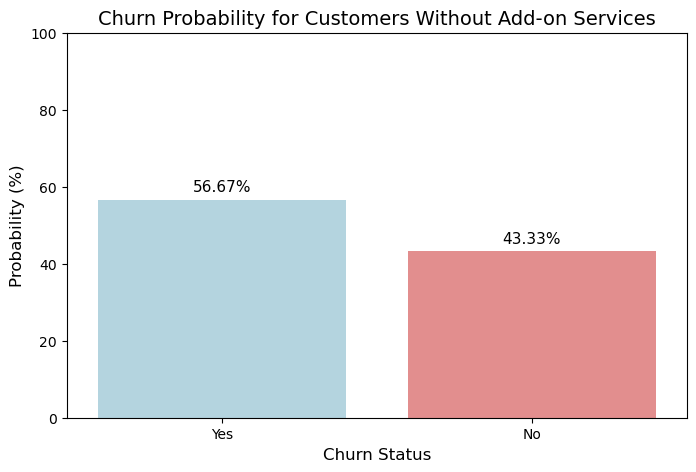

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=churn_counts_no_add_on.index, 
    y=churn_counts_no_add_on.values, 
    palette=['lightblue', 'lightcoral'],
    hue=churn_counts_no_add_on.index,
    legend=False
)

plt.title('Churn Probability for Customers Without Add-on Services', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)
plt.ylim(0, 100)  # Set y-axis to show percentages clearly

for i, value in enumerate(churn_counts_no_add_on.values):
    plt.text(i, value + 2, f'{value:.2f}%', ha='center', fontsize=11)

plt.show()


### 3. What is the probability of churn for a senior citizen using fiber optic internet and without tech support?

### **P(Churn | Senior Citizen & use fiber optic & no tech support)**  = 53.64%


In [44]:
# Filter the dataset for senior citizens with fiber optic internet and no tech support
data_filtered = df[(df['SeniorCitizen'] == 'Senior') & 
                  (df['InternetService'] == 'Fiber optic') & 
                  (df['TechSupport'] == 'No')]

# Calculate the churn probabilities for this group
churn_counts_senior_fiber_no_tech = data_filtered['Churn'].value_counts(normalize=True) * 100

print('Churn Probability for Senior Citizen that use fiber optic & no tech support:')
print(churn_counts_senior_fiber_no_tech.round(2))

Churn Probability for Senior Citizen that use fiber optic & no tech support:
Churn
Yes    53.64
No     46.36
Name: proportion, dtype: float64


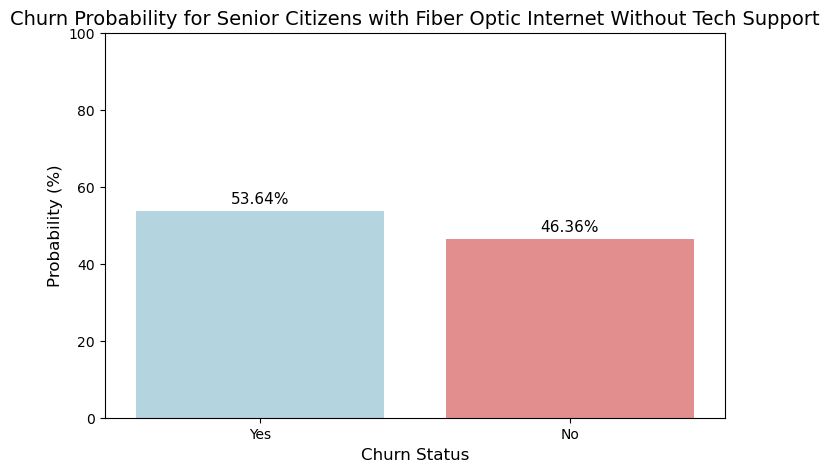

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=churn_counts_senior_fiber_no_tech.index, 
    y=churn_counts_senior_fiber_no_tech.values, 
    palette=['lightblue', 'lightcoral'],
    hue=churn_counts_senior_fiber_no_tech.index,
    legend=False
)

plt.title('Churn Probability for Senior Citizens with Fiber Optic Internet Without Tech Support', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Probability (%)', fontsize=12)
plt.ylim(0, 100) 

for i, value in enumerate(churn_counts_senior_fiber_no_tech.values):
    plt.text(i, value + 2, f'{value:.2f}%', ha='center', fontsize=11)

plt.show()

### Summary
These conditional probabilities explore the churn rate within specific customer groups. While the churn probability appears high, it is based on the assumption conditions of each group. In the next section, we will use **Bayes' Theorem** to determine whether allocating resources to address these areas will significantly impact the overall churn rate. For demonstration, we will calculate the probability of a customer being a senior citizen given that they have churned.

# 4. Baye's Theorem

### What is the probability a customer is a senior citizen given they churned? 

Churn is high among senior citizens, but most customer are non-seniors. 

In [46]:
# Step 1: Calculate probabilities needed for Bayes' Theorem
# P(Senior Citizen) - Prior Probability 
p_senior = (df['SeniorCitizen'] == 'Senior').mean()

# P(Churn | Senior Citizen) - Likelihood
p_churn_given_senior = df[df['SeniorCitizen'] == 'Senior']['Churn'].value_counts(normalize=True).get('Yes', 0)

# P(Churn) - Evidence (Overall Churn Rate)
p_churn = (df['Churn'] == 'Yes').mean()

# Step 2: Apply Bayes' Theorem
# P(Senior Citizen | Churn) - Posterior Probability
p_senior_given_churn = (p_churn_given_senior * p_senior) / p_churn

print(f"P(Senior Citizen): {p_senior:.4f}")
print(f"P(Churn | Senior Citizen): {p_churn_given_senior:.4f}")
print(f"P(Churn): {p_churn:.4f}")
print(f"P(Senior Citizen | Churn): {p_senior_given_churn:.4f}")


P(Senior Citizen): 0.1621
P(Churn | Senior Citizen): 0.4168
P(Churn): 0.2654
P(Senior Citizen | Churn): 0.2547


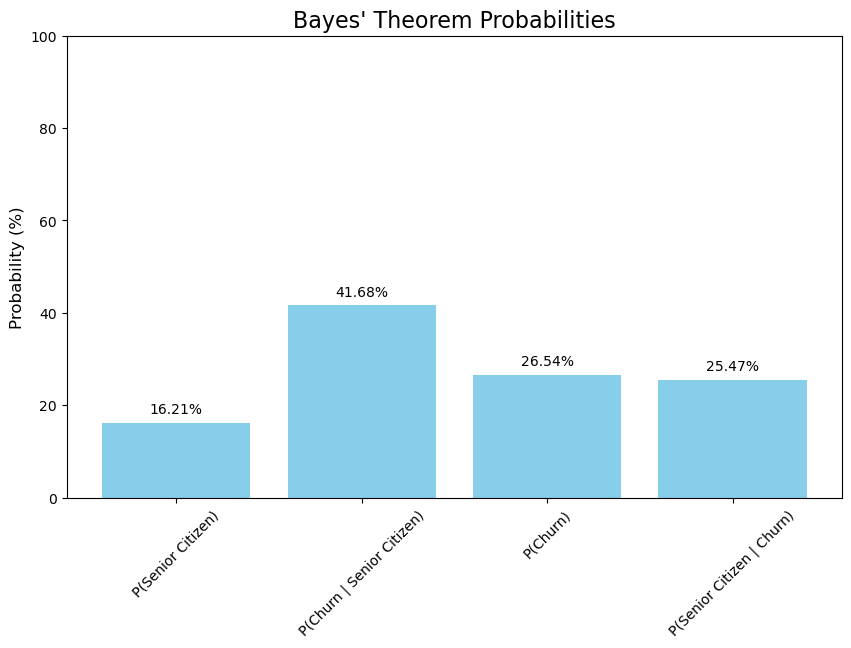

In [47]:
probabilities = {
    "P(Senior Citizen)": p_senior * 100,
    "P(Churn | Senior Citizen)": p_churn_given_senior * 100,
    "P(Churn)": p_churn * 100,
    "P(Senior Citizen | Churn)": p_senior_given_churn * 100
}

plt.figure(figsize=(10, 6))
plt.bar(probabilities.keys(), probabilities.values(), color='skyblue')
plt.title("Bayes' Theorem Probabilities", fontsize=16)
plt.ylabel("Probability (%)", fontsize=12)
plt.ylim(0, 100) 

for i, (key, value) in enumerate(probabilities.items()):
    plt.text(i, value + 2, f"{value:.2f}%", ha='center', fontsize=10)  # Format with 2 decimal places and %

# Customize x-axis
plt.xticks(rotation=45, fontsize=10)
plt.show()

### Bayes’ Theorem Analysis: Senior Citizens and Churn

From our analysis, we calculated the following probabilities:

**P(Senior Citizen)**: 16.21% – The proportion of senior citizens in the customer base.  
**P(Churn | Senior Citizen)**: 41.68% – The likelihood of churn among senior citizens.  
**P(Churn)**: 26.54% – The overall churn rate in the customer base.  
**P(Senior Citizen | Churn)**: <span style="color:red">25.47% – The probability of a customer being a senior citizen given they have churned.</span>

### Interpretation and Insights
1. Churn Rate Among Senior Citizens (P(Churn | Senior Citizen)):

    - Senior citizens have a higher churn rate (41.68%) compared to the overall churn rate (26.54%), indicating they are a high-risk group for churn.
  
2. Proportion of Senior Citizens in the Churned Population (P(Senior Citizen | Churn)):

    - Despite their high churn rate, only 25.47% of churned customers are senior citizens. This is because senior citizens make up just 16.21% of the overall customer base.
  
3. Significance for Resource Allocation:

    - While the high churn rate among senior citizens is concerning, their relatively small proportion in the total customer base limits the overall impact on churn reduction if resources are allocated solely to this group.

### Summary  

Senior citizens show a high churn rate, but their small proportion in the customer base indicates that addressing their churn alone may not significantly impact the overall churn rate. This analysis highlights the value of using **Bayes' Theorem** to evaluate whether high-risk groups contribute meaningfully to the overall problem.

In the final step of this project, we will conduct a **Weighted Contribution Analysis** to determine which groups have the most significant impact on overall churn, providing actionable insights for prioritising resources effectively.

# 4. Weighted Contribution Analysis

In [48]:
# Define key columns for analysis
key_columns = ['SeniorCitizen', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'InternetService']

# Initialize an empty DataFrame to store results
weighted_contribution = pd.DataFrame()

# Loop through each key column to calculate weighted contribution
for column in key_columns:
    # Group data by the current column and calculate churn rate and group size
    group_stats = df.groupby(column, observed=False)['Churn'].value_counts(normalize=True).unstack() * 100
    group_sizes = df[column].value_counts(normalize=True) * 100

    # Combine churn rate ('Yes') and group size into a single DataFrame
    group_contribution = pd.DataFrame({
        'Churn Rate (%)': group_stats['Yes'],
        'Group Size (%)': group_sizes
    })

    # Calculate Weighted Contribution: (Churn Rate * Group Size) / 100
    group_contribution['Weighted Contribution (%)'] = (group_contribution['Churn Rate (%)'] * group_contribution['Group Size (%)']) / 100

    # Add column name for context and append to the result DataFrame
    group_contribution['Category'] = column
    weighted_contribution = pd.concat([weighted_contribution, group_contribution])

# Reset index for better readability
weighted_contribution.reset_index(inplace=True)
weighted_contribution.rename(columns={'index': 'Group'}, inplace=True)

# Sort by Weighted Contribution for prioritization
weighted_contribution = weighted_contribution.sort_values(by='Weighted Contribution (%)', ascending=False)

# Display the top contributing groups
from IPython.display import display
display(weighted_contribution.head(10))

,Group,Churn Rate (%),Group Size (%),Weighted Contribution (%),Category
2,Month-to-month,42.709677,55.019168,23.498509,Contract
5,Yes,33.565092,59.221922,19.877893,PaperlessBilling
0,Not Senior,23.606168,83.785319,19.778503,SeniorCitizen
12,Fiber optic,41.892765,43.958540,18.415448,InternetService
9,Electronic check,45.285412,33.579441,15.206588,PaymentMethod
1,Senior,41.681261,16.214681,6.758484,SeniorCitizen
6,No,16.330084,40.778078,6.659094,PaperlessBilling
11,DSL,18.959108,34.374556,6.517109,InternetService
10,Mailed check,19.106700,22.887974,4.373136,PaymentMethod
7,Bank transfer (automatic),16.709845,21.922476,3.663212,PaymentMethod


### Weighted Contribution Formula

The **Weighted Contribution** is calculated as:

\\[
\text{Weighted Contribution} = \text{Churn Rate (\%)} \times \text{Group Size (\%)}
\\]

Where:
- **Churn Rate (%)**: The percentage of churn within a specific group.
- **Group Size (%)**: The percentage of the overall customer base represented by that group.


### Summary  
The Weighted Contribution Analysis helps identify which customer groups contribute the most to the overall churn rate by considering both their churn rate and their size in the customer base.  

Here are the key findings:

- **Month-to-Month Contracts**: This group has the biggest impact on churn, contributing 23.50%. They have a high churn rate (42.71%) and make up a large portion of the customer base (55.02%). Reducing churn here would make the biggest difference.
  
- **Paperless Billing**: Customers using paperless billing contribute 19.88% to overall churn, with a churn rate of 33.57% and a group size of 59.22%. This is another important group to focus on.
  
- **Fiber Optic Internet Users**: Contributing 18.41% to churn, this group has a churn rate of 41.89% and represents 43.96% of the customer base.
  
- **Electronic Check Payments**: Although this group is smaller (33.58%), its churn rate is the highest (45.29%), making it an important contributor (15.21%).
  
- Smaller groups, like senior citizens and DSL internet users, have high churn rates but contribute less to overall churn due to their smaller sizes.  

# Project Summary

This project explored customer churn in the telecom industry using a combination of data analysis techniques, including exploratory data analysis, conditional probability, and Bayesian thinking. By conducting the Weighted Contribution Analysis, we identified key groups that contribute most to the overall churn rate.

While groups like senior citizens and customers without add-on services show high churn rates, their smaller group sizes mean they have less impact on overall churn. In contrast, groups with month-to-month contracts, paperless billing, and fiber optic internet have the highest contributions, making them priority areas for intervention.

These insights provide clear, actionable steps for reducing churn, such as offering discounts or incentives for customers in these high-impact groups. Future work could focus on building predictive models to identify individual churn risks and testing strategies to improve customer retention effectively.

By aligning decisions with these findings, resources can be allocated to areas that will have the greatest impact, ensuring data-driven outcomes.